# ex_diabets

## 0. 連接雲端硬碟，起始準備

In [1]:
# 連接雲端硬碟，起始準備

from google.colab import drive
drive.mount('/content/drive')

# 移到資料夾
%cd /content/drive/MyDrive/class_AI/ex_diabetes/
!pwd
!ls

Mounted at /content/drive
/content/drive/MyDrive/class_AI/ex_diabetes
/content/drive/MyDrive/class_AI/ex_diabetes
1_MLP_logistic_regression.ipynb  2_MLP_better.ipynb  diabetes.csv


In [ ]:
!wget 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'

## 1. MLP 模型 - Logistic Regression

In [2]:
# 匯入套件模組
import tensorflow
print(tensorflow.__version__)

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


2.15.0


In [3]:
# 讀取資料集 - 載入糖尿病資料集
df = pd.read_csv('./diabetes.csv')
dataset = df.values


In [4]:
# 訓練資料準備
np.random.seed(10)  # 指定亂數種子
np.random.shuffle(dataset)  # 使用亂數打亂資料

# 分割成輸入的訓練資料和標籤資料
x_train = dataset[:, 0:8]
y_train = dataset[:, 8]


In [5]:
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()  # 顯示模型摘要資訊

# 編譯模型
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 187 (748.00 Byte)
Trainable params: 187 (748.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# 訓練模型
history = model.fit(x_train, y_train, epochs=150, batch_size=10, verbose=0)


In [7]:
print(history.history)
print(history.history.keys())

{'loss': [1.4070106744766235, 0.6767919063568115, 0.6667020916938782, 0.6603150367736816, 0.6561346054077148, 0.6531800627708435, 0.6511241793632507, 0.6497169733047485, 0.6487439870834351, 0.6481764316558838, 0.6477013826370239, 0.6473140120506287, 0.6471036672592163, 0.6468917727470398, 0.6468189358711243, 0.6467738747596741, 0.6467169523239136, 0.64664626121521, 0.6466377377510071, 0.6465574502944946, 0.6465632915496826, 0.6466132998466492, 0.6466284990310669, 0.6466164588928223, 0.64656001329422, 0.6465660929679871, 0.6465449333190918, 0.6465256810188293, 0.6466280221939087, 0.6465521454811096, 0.6465834975242615, 0.6465351581573486, 0.6465499997138977, 0.6464879512786865, 0.646504282951355, 0.6465755105018616, 0.6466161012649536, 0.646539568901062, 0.64657062292099, 0.646548330783844, 0.6465486288070679, 0.6465196013450623, 0.6465126276016235, 0.6465322375297546, 0.6465851068496704, 0.6465734243392944, 0.6465420126914978, 0.6465180516242981, 0.6465304493904114, 0.6465164422988892,

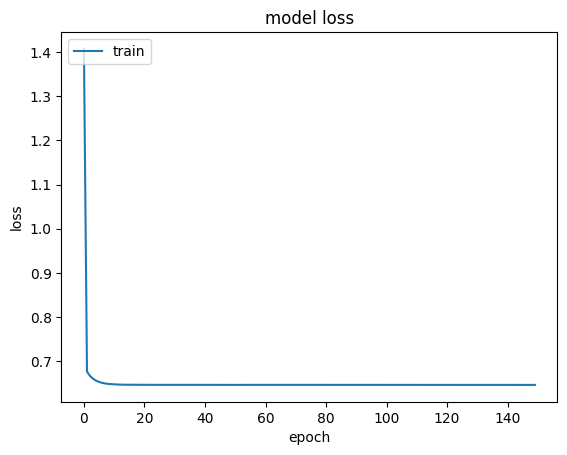

In [8]:
# 查看 lose 過程
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


In [9]:
# 評估模型
loss, accuracy = model.evaluate(x_train, y_train, verbose=0)
print('準確度 = {:.2f}'.format(accuracy))


準確度 = 0.65


## 完整的程式

In [ ]:
# 匯入套件模組
import tensorflow
print(tensorflow.__version__)

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 讀取資料集 - 載入糖尿病資料集
df = pd.read_csv('./diabetes.csv')
dataset = df.values

# 訓練資料準備
np.random.seed(10)  # 指定亂數種子
np.random.shuffle(dataset)  # 使用亂數打亂資料

# 分割成輸入的訓練資料和標籤資料
x_train = dataset[:, 0:8]
y_train = dataset[:, 8]

# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()  # 顯示模型摘要資訊

# 編譯模型
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 訓練模型
model.fit(x_train, y_train, epochs=150, batch_size=10)

# 評估模型
loss, accuracy = model.evaluate(x_train, y_train, verbose=0)
print('準確度 = {:.2f}'.format(accuracy))
